In [21]:
from glob import glob
import numpy as np
import xarray as xr
import json
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import os

In [25]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [120]:
#matplotlib notebook
plt.style.use('seaborn') # pretty matplotlib plots
plt.rcParams['figure.figsize'] = (12, 8)
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rcParams['text.usetex'] = False
#plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}'] #for \text command

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [8]:
diri="//smb.uni-oldenburg.de/hpc_data/thesis/data/results"
NfilesCE=glob(diri+"/*CE-NodewiseStat.json")
print(NfilesCE)
NfilesGB=glob(diri+"/*GB-NodewiseStat.json")
print(NfilesGB)
DfilesCE=glob(diri+"/*CE-DomainStat.json")
print(DfilesCE)
DfilesGB=glob(diri+"/*GB-DomainStat.json")
print(DfilesGB)

['//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220403-215439_20220404-104804__wind-20220519-113058__wind-20220520-215250__wind-20220419-143003_20220420-182503__wind-20220413-182848-CE-NodewiseStat.json', '//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220403-215439_20220404-104804__wind-20220519-113058__wind-20220520-215250__wind-20220419-143003_20220420-182503__wind-20220413-182848__wind-20220430-180155__wind-20220429-211329-CE-NodewiseStat.json', '//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220430-180155__wind-20220429-211329-CE-NodewiseStat.json', '//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220524-135041__wind-20220527-191118__wind-20220528-031534-CE-NodewiseStat.json', '//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220528-031534__wind-20220602-122733__wind-20220603-122238-CE-NodewiseStat.json', '//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220529-120253-CE-NodewiseStat.json']
['//smb.uni-olden

In [9]:
def get_dict_and_merge(files):
    d_all={}
    for file in files:
        with open(file) as fp:
            d=json.load(fp)
        d_all={**d_all, **d} #python version > 3.5
    return d_all

In [10]:
dn_CE=get_dict_and_merge(NfilesCE[-3:-1])#["//smb.uni-oldenburg.de/hpc_data/thesis/data/results\\wind-20220528-031534__wind-20220602-122733__wind-20220603-122238-CE-NodewiseStat.json"])#NfilesCE[-3:-1])

dd_CE=get_dict_and_merge(DfilesCE[-3:-1])


OSError: [Errno 22] Invalid argument

In [140]:
dn_GB=get_dict_and_merge(NfilesGB[:-1])

dd_GB=get_dict_and_merge(DfilesGB[:-1])

In [108]:
import matplotlib.colors

In [138]:
def plot_windf(dat,lons,lats,proj=ccrs.PlateCarree()):
    # more complex figure with vectors and projections 
    # custom labels and country divisions

    lats_ticks =np.arange(np.round(np.min(lats),0),round(np.max(lats),0)+2,2)#[51,52,53,54,55]
    lons_ticks = np.arange(np.round(np.min(lons),1),round(np.max(lons),1),2)#[4,6,8,10,12]
    lev = np.arange(np.min([np.round(np.percentile(dat,1),1)-0.5,0]),np.round(np.percentile(dat,99),0)+0.5,0.05) # levels to plot
    
    fig = plt.figure(figsize=(12,16)) #figure instance and ax to plot
    # when you import cartopy you can specify the projection of your figure
    # ccrs.PlateCarree() is the projection coordinate
    ax = fig.add_subplot(1, 1, 1, projection=proj) 
    ax.set_extent([np.round(np.min(lons)-0.2,1),
                   np.round(np.max(lons)+0.2,1),
                   np.round(np.min(lats)-0.2,1),
                   np.round(np.max(lats)+0.2,1)],
                   crs=ccrs.PlateCarree())
    # cmap is for a colormap and extend is related to the levels
    cs = ax.contourf(lons,lats, dat, levels=lev, 
                     cmap='viridis',origin="lower",transform=ccrs.PlateCarree())


    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                      linewidth=.5,color='gray', alpha=0.5, 
                      linestyle='dotted')
    # this part is only for formatting the lables
    ax.set_yticks(np.arange(45,57,1.5),crs=proj) # set labels
    ax.set_xticks(np.arange(0,27,3), crs=proj)
    ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER) # set format of labels
    ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)
    # set fontsize of labels
    #[tick.label.set_fontsize(9) for tick in ax.yaxis.get_major_ticks()] 
    #[tick.label.set_fontsize(9) for tick in ax.xaxis.get_major_ticks()]

    # creatting another ax for the colorbar
    cax = fig.add_axes([0.9,0.33, 0.015, 0.33])
    #[left, bottom, width, height]
    #divider = make_axes_locatable(ax)
    #cax = divider.append_axes('right', size='5%', pad=0.05)
    # asociate the colorbar with the values of the wind speed
#     cbar = fig.colorbar(windspeed, cax =cax, orientation='vertical', 
#                         drawedges=True, alpha=3)
#     # set different fontsize
#     for tick in cbar.ax.get_yticklabels():
#         tick.set_fontsize(11)
#     # label of the colorbar
#     cbar.set_label(u'wind speed [m/s]',labelpad=7, fontsize=12)
    
    
    norm= matplotlib.colors.Normalize(vmin=np.percentile(dat,1), vmax=np.percentile(dat,99))

    sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)
    sm.set_array([])
    cbar=fig.colorbar(sm, ticks=np.arange(cs.levels[0],cs.levels[-1],0.2),cax=cax, orientation='vertical', alpha=3)
    cbar.set_label(u'wind speed [m/s]',labelpad=7)# fontsize=12)


    # borders and coastlines
    #ax.add_feature(cfeature.BORDERS)
    ax.coastlines(resolution='10m')


    
    
    #plt.savefig(pp, format='pdf')
    #plt.close()

In [12]:
nc_files=glob("//smb.uni-oldenburg.de/hpc_data/NEWA_nc/*.nc")
nc_files

['//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2017-2017-01-07.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-03-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-06-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-09-01.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-CE-2018-2018-12-17.nc',
 '//smb.uni-oldenburg.de/hpc_data/NEWA_nc\\P-GB-2018-2018-12-17.nc']

In [13]:
ds_CE=xr.open_dataset(nc_files[0])
#south_north=slice(2,412)

In [14]:
ds=ds_CE
globe = ccrs.Globe(ellipse='sphere', semimajor_axis=6370000, semiminor_axis=6370000)
lcc = ccrs.LambertConformal(globe=globe, # important!
                            central_longitude=ds.STAND_LON, central_latitude=ds.MOAD_CEN_LAT,
                            standard_parallels=(ds.TRUELAT1, ds.TRUELAT2),
                            )

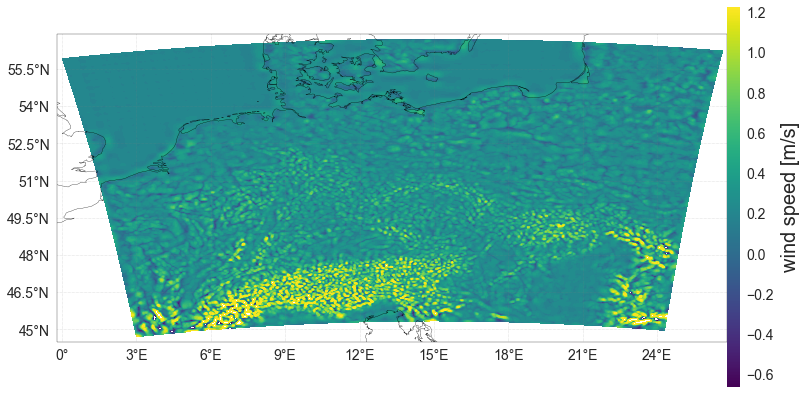

In [139]:
ds=ds_CE.isel(time=0,south_north=slice(2,412))
plot_windf(np.asarray(dn_CE['CNN1 - no static']["MD"]),ds.XLON.values,ds.XLAT.values)#lcc)

In [141]:
def set_projected_wrf_coordinates(ds):
    
    if ds.MAP_PROJ == 1:
        print("Lambert projection")
        wrf_proj = pyproj.Proj(proj='lcc', # projection type: Lambert Conformal Conic
                               lat_1=ds.TRUELAT1, lat_2=ds.TRUELAT2, # Cone intersects with the sphere
                               lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON, # Center point
                               a=6370000, b=6370000) # This is it! The Earth is a perfect sphere
    elif ds.MAP_PROJ == 2:
         wrf_proj = pyproj.Proj(proj='stere',
             lat_1=ds.TRUELAT1, lat_2=ds.TRUELAT2,
             lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON,
                                a=6370000, b=6370000)

    elif ds.MAP_PROJ == 3:
        # radius earth has to be specified, see here:
        # https://gis.stackexchange.com/questions/203923/using-pyproj-and-mercator-x-0-0-and-y-0-0
        rad_earth = 6370000 * np.cos(np.radians(ds.TRUELAT1))
        wrf_proj = pyproj.Proj(proj='merc',
                               lat_1=ds.TRUELAT1, lat_2=ds.TRUELAT2,
                               lat_0=ds.MOAD_CEN_LAT, lon_0=ds.STAND_LON,
                               a=rad_earth, b=rad_earth)
    else:
        raise NotImplementedError(
            'Only llc and mercator (MAP_PROJ=1 or 3) supported at the moment!')
    
    wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')

    ds.attrs['wrf_proj'] = wrf_proj
    
    wgs_proj = pyproj.Proj(proj='latlong', datum='WGS84')
    trans = pyproj.Transformer.from_proj(wgs_proj, wrf_proj)
    e, n = trans.transform(ds.CEN_LON, ds.CEN_LAT)
    dx, dy = ds.DX, ds.DY
    nx, ny = ds.dims['west_east'], ds.dims['south_north']
    x0 = -(nx-1) / 2. * dx + e
    y0 = -(ny-1) / 2. * dy + n
    x = np.arange(nx) * dx + x0
    y = np.arange(ny) * dy + y0
    ds = ds.assign_coords(west_east=(('west_east',), x),
                          south_north=(('south_north'), y))


    return ds

In [144]:
set_projected_wrf_coordinates(ds)

Lambert projection


<xarray.Dataset>
Dimensions:      (height: 7, south_north: 410, west_east: 540)
Coordinates:
    time         datetime64[ns] 2017-01-07
  * height       (height) float32 50.0 75.0 100.0 150.0 200.0 250.0 500.0
  * south_north  (south_north) float64 -9.33e+05 -9.3e+05 ... 2.91e+05 2.94e+05
  * west_east    (west_east) float64 -9.12e+05 -9.09e+05 ... 7.02e+05 7.05e+05
    XLAT         (south_north, west_east) float32 44.70256 ... 56.227684
    XLON         (south_north, west_east) float32 3.0052185 ... 26.640076
Data variables:
    crs          |S1 ...
    Times        |S19 ...
    ABLAT_CYL    (height, south_north, west_east) float32 ...
    ACCRE_CYL    (height, south_north, west_east) float32 ...
    ALPHA        (south_north, west_east) float32 ...
    HFX          (south_north, west_east) float32 ...
    HGT          (south_north, west_east) float32 ...
    LANDMASK     (south_north, west_east) float32 ...
    LH           (south_north, west_east) float32 ...
    LU_INDEX     (south_north, west_east) float32 ...
    PBLH         (south_north, west_east) float32 ...
    WS           (height, south_north, west_east) float32 ...
    WD           (height, south_north, west_east) float32 ...
    PD           (height, south_north, west_east) float32 ...
    PRECIP       (south_north, west_east) float32 ...
    PSFC         (south_north, west_east) float32 ...
    Q2           (south_north, west_east) float32 ...
    QVAPOR       (height, south_north, west_east) float32 ...
    RHO          (south_north, west_east) float32 ...
    RMOL         (south_north, west_east) float32 ...
    SEAICE       (south_north, west_east) float32 ...
    SWDDIR       (south_north, west_east) float32 ...
    SWDDNI       (south_north, west_east) float32 ...
    T            (height, south_north, west_east) float32 ...
    T2           (south_north, west_east) float32 ...
    TKE          (height, south_north, west_east) float32 ...
    TSK          (south_north, west_east) float32 ...
    UST          (south_north, west_east) float32 ...
    WD10         (south_north, west_east) float32 ...
    WS10         (south_north, west_east) float32 ...
    ZNT          (south_north, west_east) float32 ...
Attributes:
    TITLE:                           Timeseries of the New European Wind Atla...
    START_DATE:                      2017-01-04_00:00:00
    SIMULATION_START_DATE:           2017-01-04_00:00:00
    WEST-EAST_GRID_DIMENSION:        541
    SOUTH-NORTH_GRID_DIMENSION:      415
    BOTTOM-TOP_GRID_DIMENSION:       61
    DX:                              3000.0
    DY:                              3000.0
    SKEBS_ON:                        0
    SPEC_BDY_FINAL_MU:               1
    USE_Q_DIABATIC:                  0
    GRIDTYPE:                        C
    DIFF_OPT:                        1
    KM_OPT:                          4
    DAMP_OPT:                        0
    DAMPCOEF:                        0.15
    KHDIF:                           0.0
    KVDIF:                           0.0
    MP_PHYSICS:                      4
    RA_LW_PHYSICS:                   4
    RA_SW_PHYSICS:                   4
    SF_SFCLAY_PHYSICS:               2
    SF_SURFACE_PHYSICS:              2
    BL_PBL_PHYSICS:                  5
    CU_PHYSICS:                      0
    SF_LAKE_PHYSICS:                 0
    SURFACE_INPUT_SOURCE:            1
    SST_UPDATE:                      1
    GRID_FDDA:                       0
    GFDDA_INTERVAL_M:                0
    GFDDA_END_H:                     0
    GRID_SFDDA:                      0
    SGFDDA_INTERVAL_M:               0
    SGFDDA_END_H:                    0
    HYPSOMETRIC_OPT:                 2
    USE_THETA_M:                     0
    SF_URBAN_PHYSICS:                0
    SHCU_PHYSICS:                    0
    MFSHCONV:                        0
    FEEDBACK:                        0
    SMOOTH_OPTION:                   2
    SWRAD_SCAT:                      1.0
    W_DAMPING:                     

In [143]:
import pyproj